In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from general_utils import utils
from general_utils.OverallDetailComparisonPlot import OverallDetailComparisonPlot
utils.default_plot_format()

#data_path = "processed_data/raw_10min_Nabian.pkl"
# result_path = "processed_data/manual_10min_2025_03_03.pkl"
data_path = "processed_data/raw_metrics/optimized_raw_10min_Nabian.pkl"
result_path = "processed_data/optimized_manual_10min_2025_03_03.pkl"

In [2]:
pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

t_start      t_end        SDRR      RMSSD  pNN50 (%)  Mean HR (bpm)  \
0      0.764    600.396   59.953222  50.339557   4.161567      81.746048   
1  72044.620  72644.440   50.436358  50.276590  11.294766      72.622536   
2  71444.292  72043.800   44.108359  39.049144  11.699164      71.855928   
3  70844.052  71443.432   64.323347  47.553402   9.686221      73.359897   
4  70243.220  70843.104  111.205365  95.765520   6.415621      71.718719   

      ULF Power  ULF Peak Frequency  ULF Peak Power  VLF Power  ...  \
0  2.811084e-09            0.000000    1.972500e-06   0.000002  ...   
1  4.896880e-10            0.001667    3.819060e-07   0.000001  ...   
2  6.034593e-09            0.000000    4.631651e-06   0.000002  ...   
3  8.791265e-09            0.000000    7.081658e-06   0.000004  ...   
4  1.290554e-08            0.001667    8.629014e-06   0.000008  ...   

   Complications  Nephropathy  Retinopathy and cataract    DPN  Heart Disease  \
0            0.0          0.0                       0.0  False            0.0   
1            0.0          0.0                       0.0  False            0.0   
2            0.0          0.0                       0.0  False            0.0   
3            0.0          0.0                       0.0  False            0.0   
4            0.0          0.0                       0.0  False            0.0   

   atherosclerosis or stenosis  Carotid Plaque  Condition  Peak Power  \
0                          0.0             0.0   Diabetes    0.000202   
1                          0.0             0.0   Diabetes    0.000645   
2                          0.0             0.0   Diabetes    0.000644   
3                          0.0             0.0   Diabetes    0.000629   
4                          0.0             0.0   Diabetes    0.000325   

   Peak Frequency  
0        0.290178  
1        0.181721  
2        0.178480  
3        0.176849  
4        0.365071  

[5 rows x 65 columns]

# Helper Func


In [3]:
from project_utils import Cleaner

cleaner = Cleaner.Cleaner(data)


In [4]:
indicator_columns

['SDRR',
 'RMSSD',
 'pNN50 (%)',
 'Mean HR (bpm)',
 'Peak Frequency',
 'Peak Power',
 'VLF Power',
 'VLF Peak Frequency',
 'LF Power',
 'LF Peak Frequency',
 'HF Power',
 'HF Peak Frequency',
 'LF÷HF Ratio',
 'S',
 'SD1',
 'SD2',
 'SD1÷SD2',
 'ApEn',
 'SampEn',
 'DFA α1',
 'DFA α2',
 'D2']

# Linear Metric Cleaning

## Mean HR (bpm)

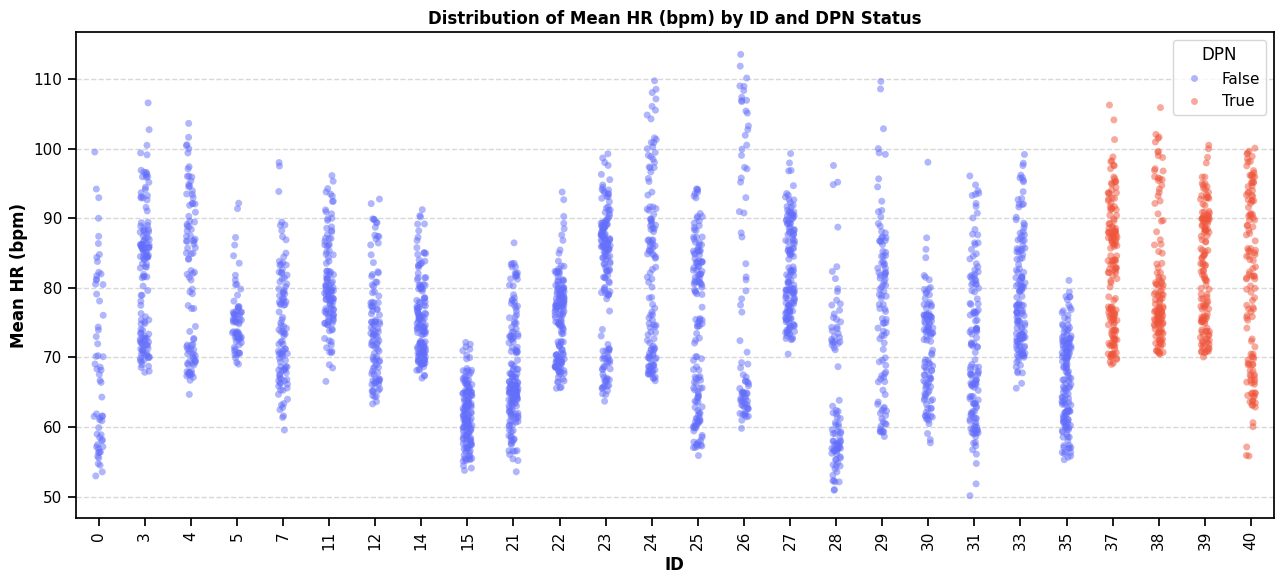

In [5]:
cleaner.upper('Mean HR (bpm)', 115)
cleaner.lower('Mean HR (bpm)', 53, [5])
cleaner.lower('Mean HR (bpm)', 62, [24])
cleaner.lower('Mean HR (bpm)', 40)
cleaner.lower('Mean HR (bpm)', 60, [38])

HR_upper_removal = [
    [110, [11, 12]],
    [94, [8, 14, 18]],
    [105, [15]],
]
cleaner.upper_array('Mean HR (bpm)', HR_upper_removal)

cleaner.draw_metric('Mean HR (bpm)');

## SDRR

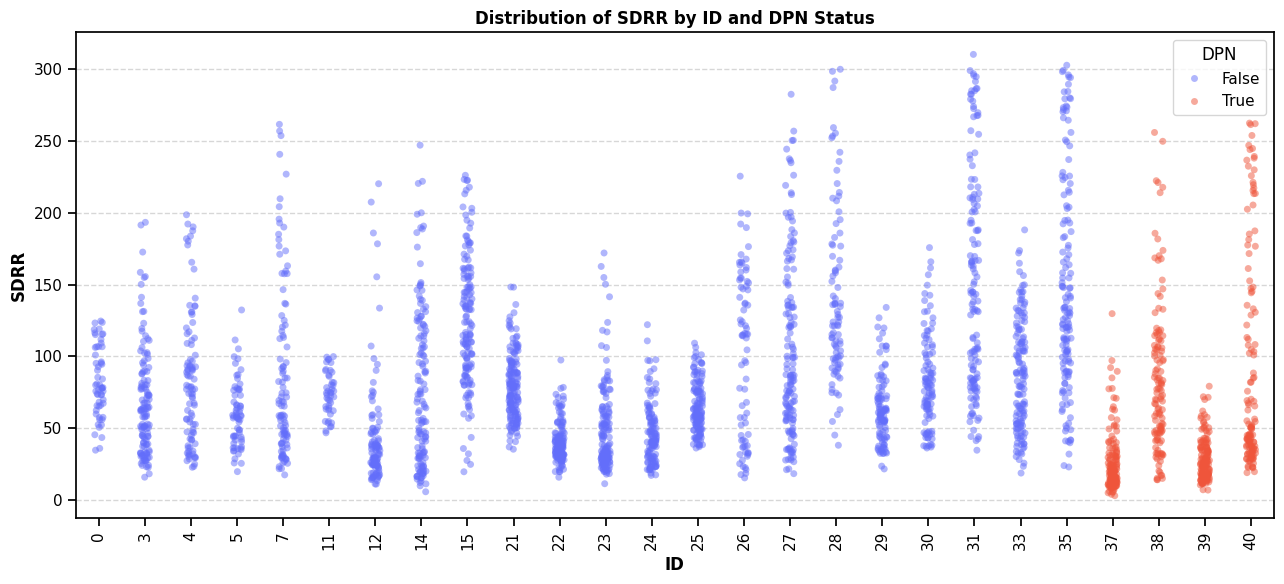

In [6]:
cleaner.upper("SDRR", 310)

SDRR_upper_removal = [
    [200, [3,4,5,10,20,13, 24, 30, 23]],
    [100, [11]],
    [95, [6]],
    [150, [0]],
    [270, [2]],
    [270, [19]],
    [110, [25]],
    [90, [16]],
    [260, [17]],
]

cleaner.upper_array("SDRR", SDRR_upper_removal)

cleaner.draw_metric("SDRR");

### RMSSD

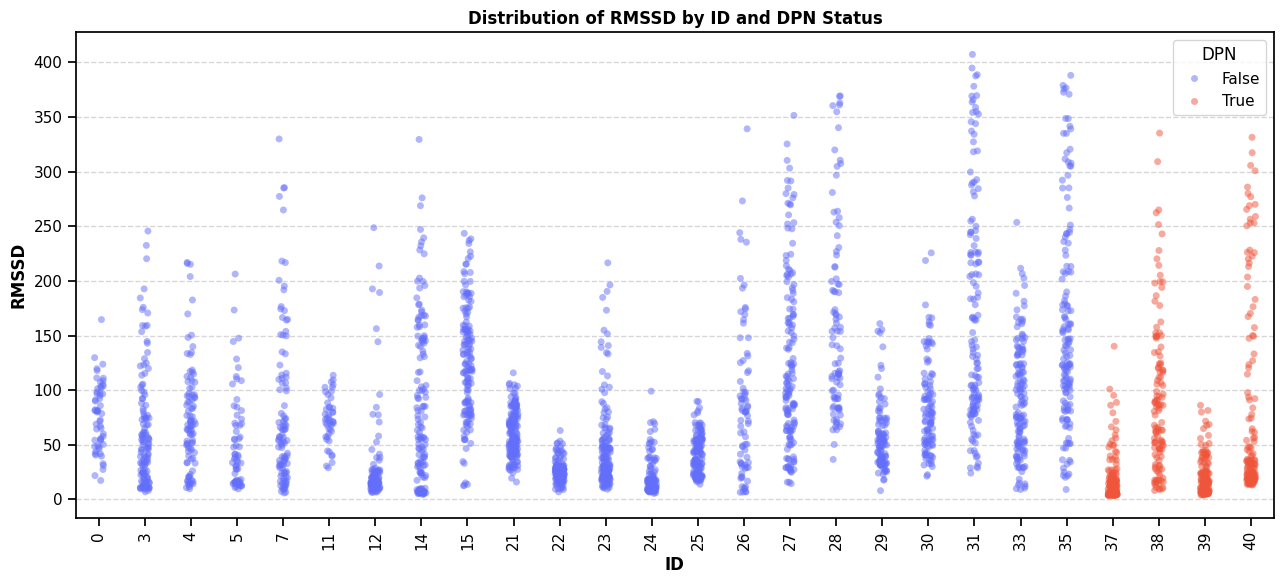

In [7]:


RMSSD_upper_removal =[
[150, [0]],
[300, [8, 22]],
[250, [4]],
[7,[100]],
[300, [8]],
[150, [1]],
]

for threshold, ids in SDRR_upper_removal:
    cleaner.upper("SDRR", threshold, ids)


cleaner.draw_metric('RMSSD');

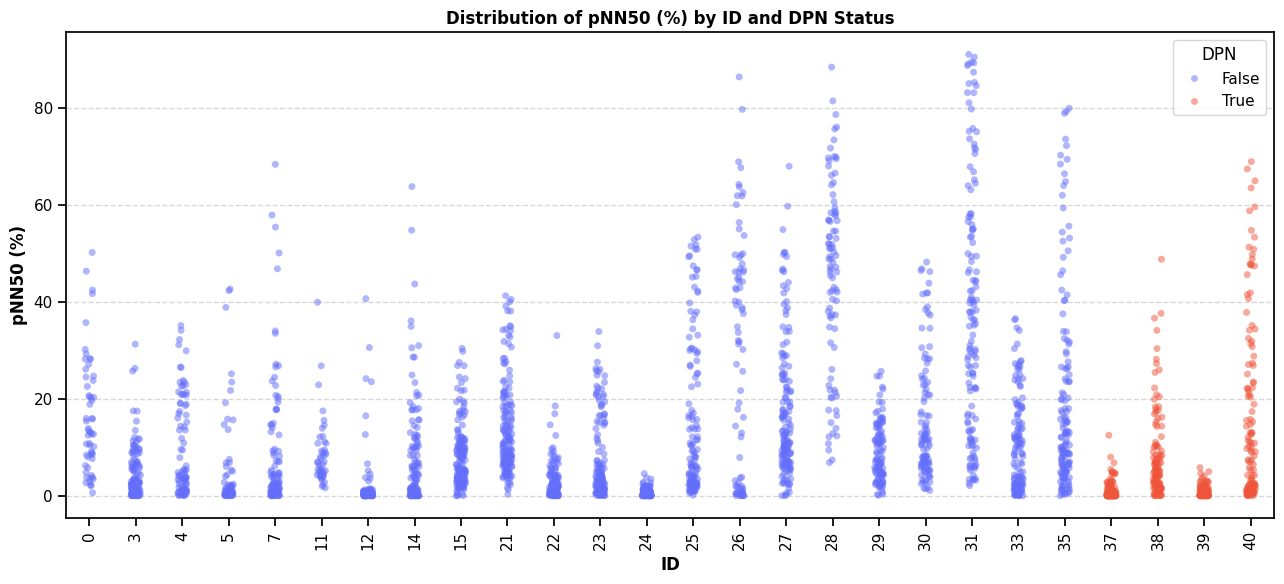

In [8]:
#cleaner.upper('pNN50 (%)')

pNN50_upper_removal = [
    [45, [2,8,17,22]],
    [75, [20]],
    [20, [16]]
]

cleaner.upper_array('pNN50 (%)', pNN50_upper_removal)

cleaner.draw_metric('pNN50 (%)');

# Frequency domain metrics

In [9]:
frequency_metrics

['Peak Frequency',
 'Peak Power',
 'VLF Power',
 'VLF Peak Frequency',
 'LF Power',
 'LF Peak Frequency',
 'HF Power',
 'HF Peak Frequency',
 'LF÷HF Ratio']

## Power

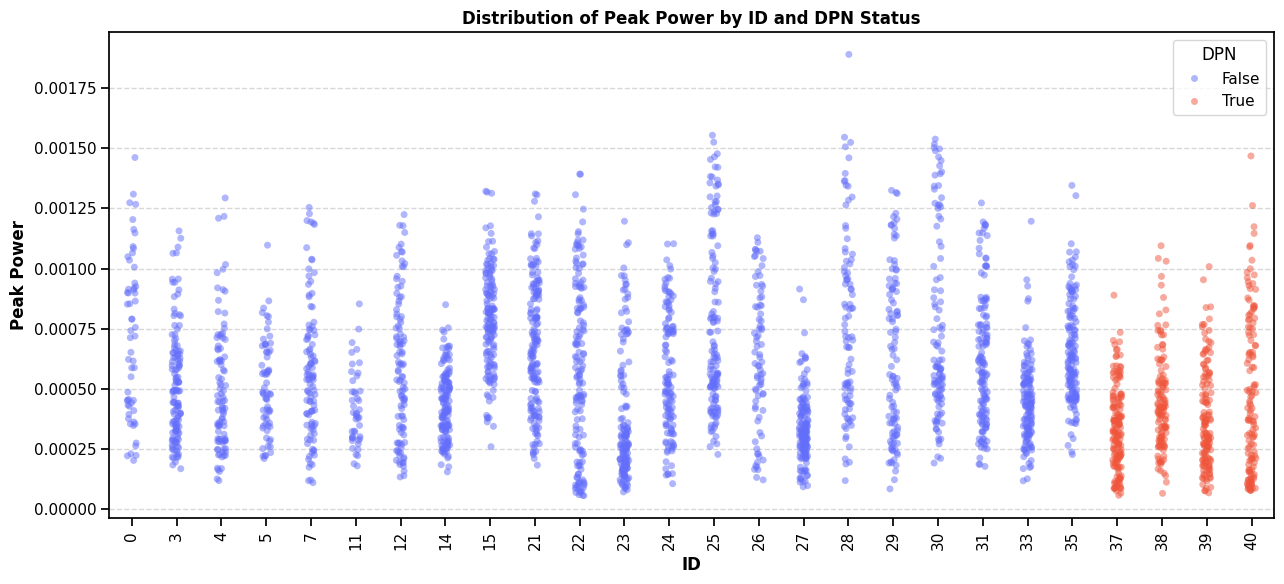

In [10]:
cleaner.draw_metric('Peak Power');

### VLF Power

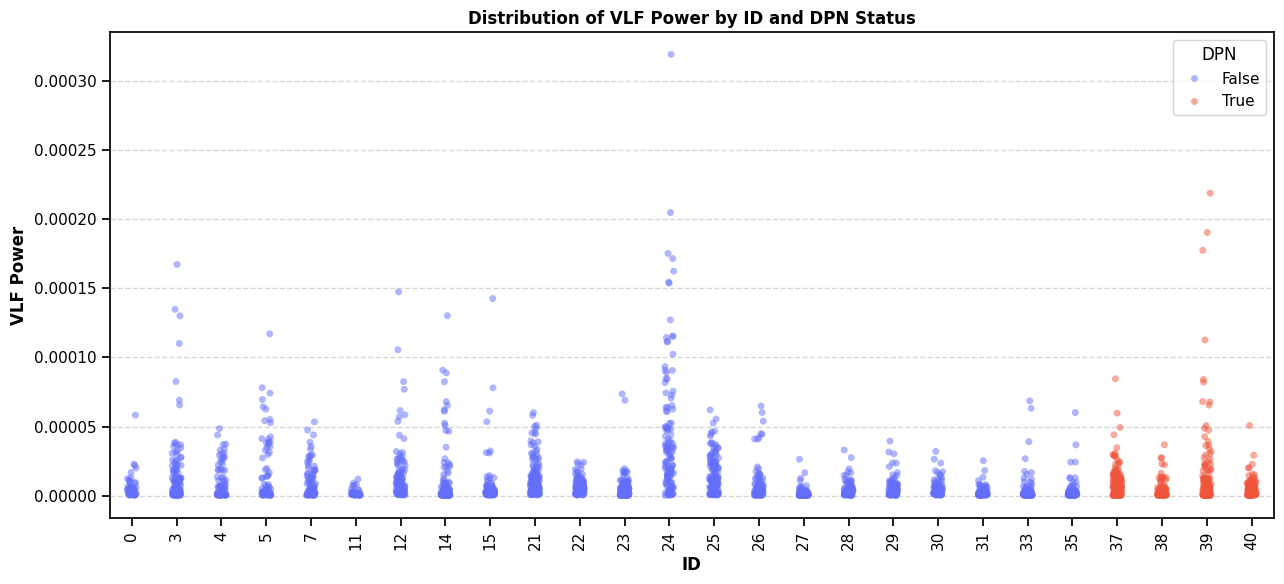

In [11]:
cleaner.upper('VLF Power', 100)
cleaner.draw_metric('VLF Power');

data[data["VLF Power"]<0.0002]

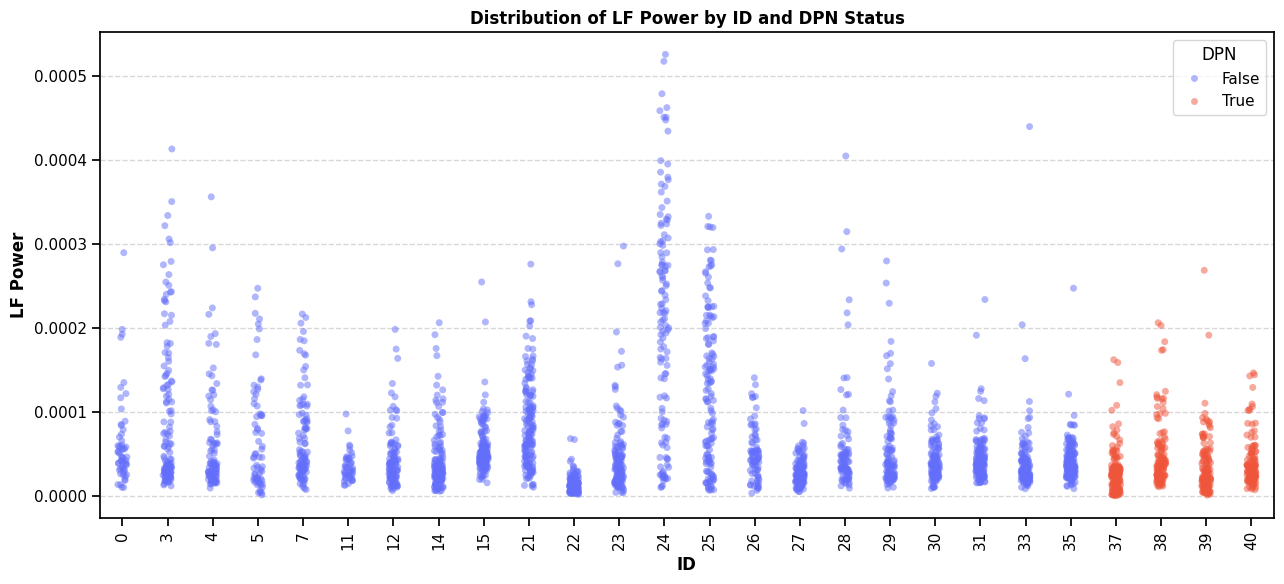

In [12]:
cleaner.upper('LF Power', 2000)
cleaner.draw_metric('LF Power');

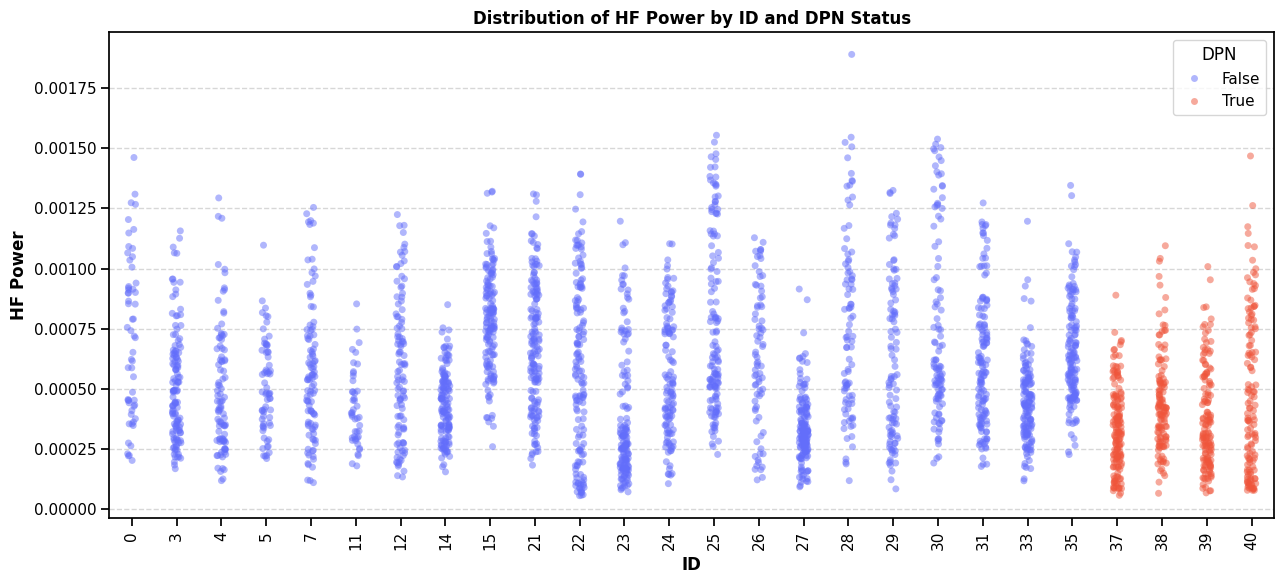

In [13]:
cleaner.upper('HF Power', 35000)
cleaner.upper('HF Power', 15000, [38]);
cleaner.draw_metric('HF Power');

# Peak Frequency

### VLF Peak Frequency

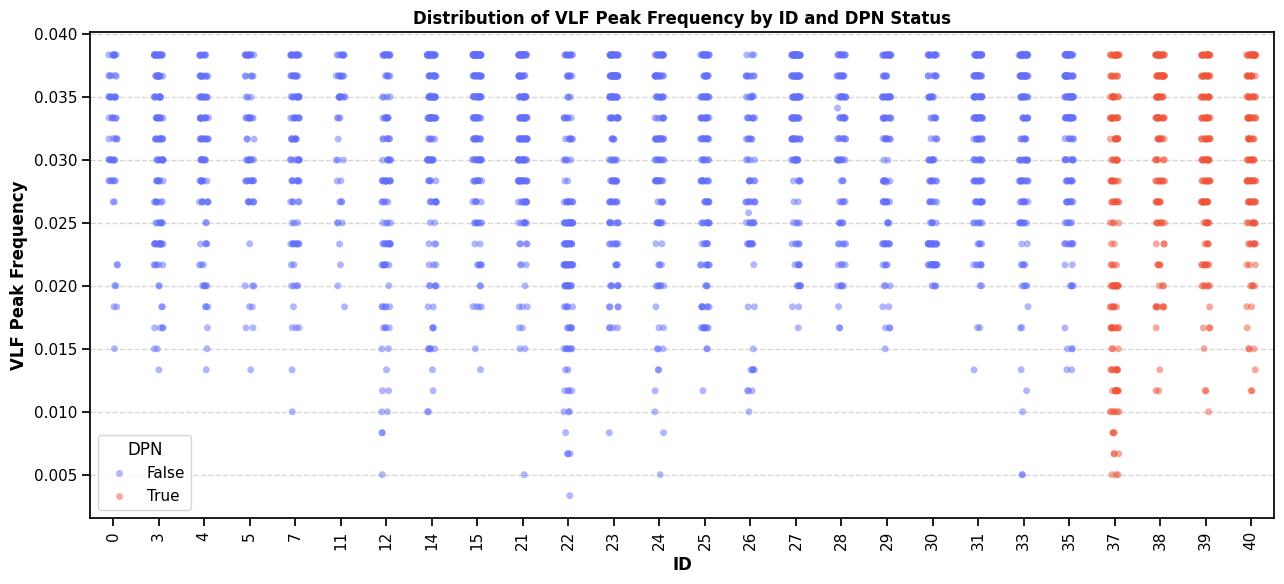

In [14]:
cleaner.draw_metric('VLF Peak Frequency');

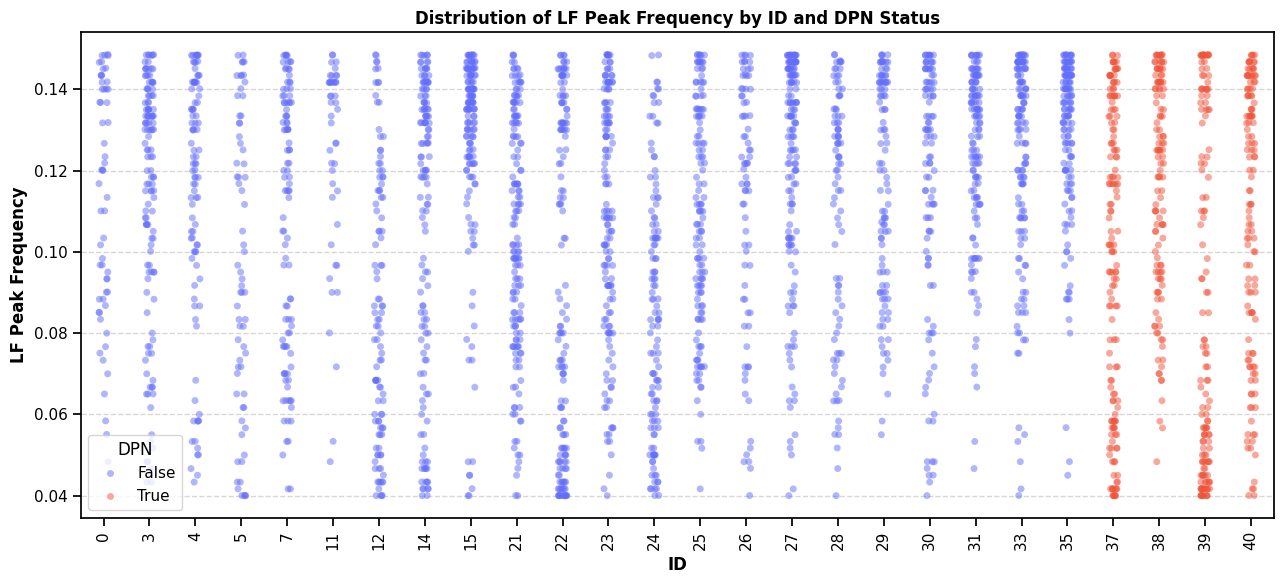

In [15]:
cleaner.draw_metric('LF Peak Frequency');

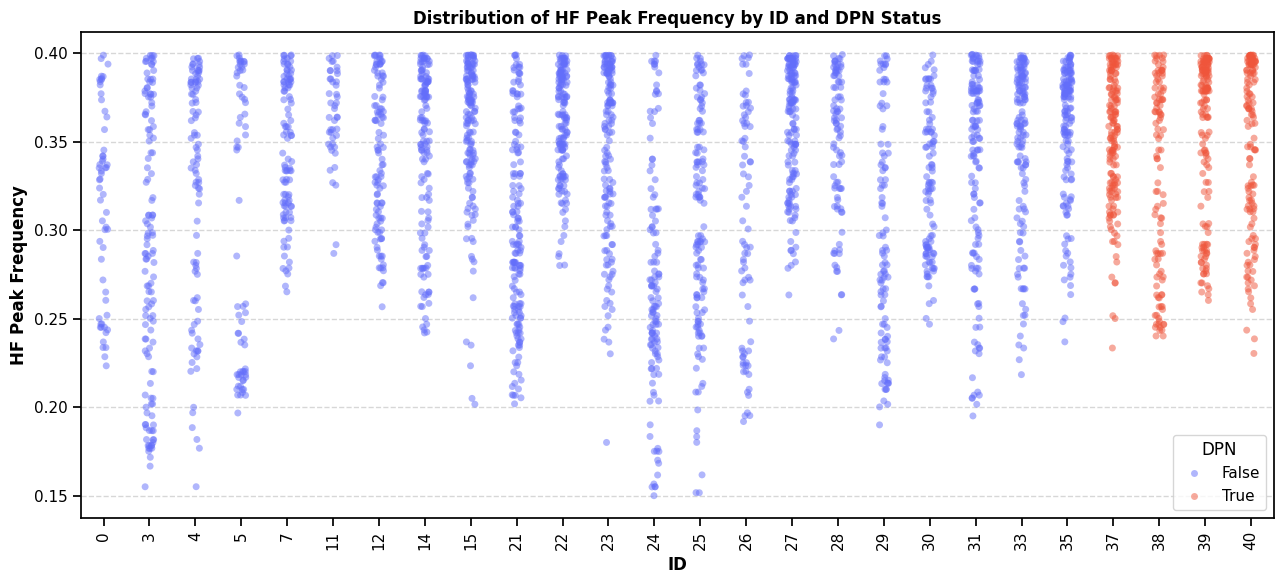

In [16]:
cleaner.lower('HF Peak Frequency', 0.24, [7,14,27,38])
cleaner.draw_metric('HF Peak Frequency');

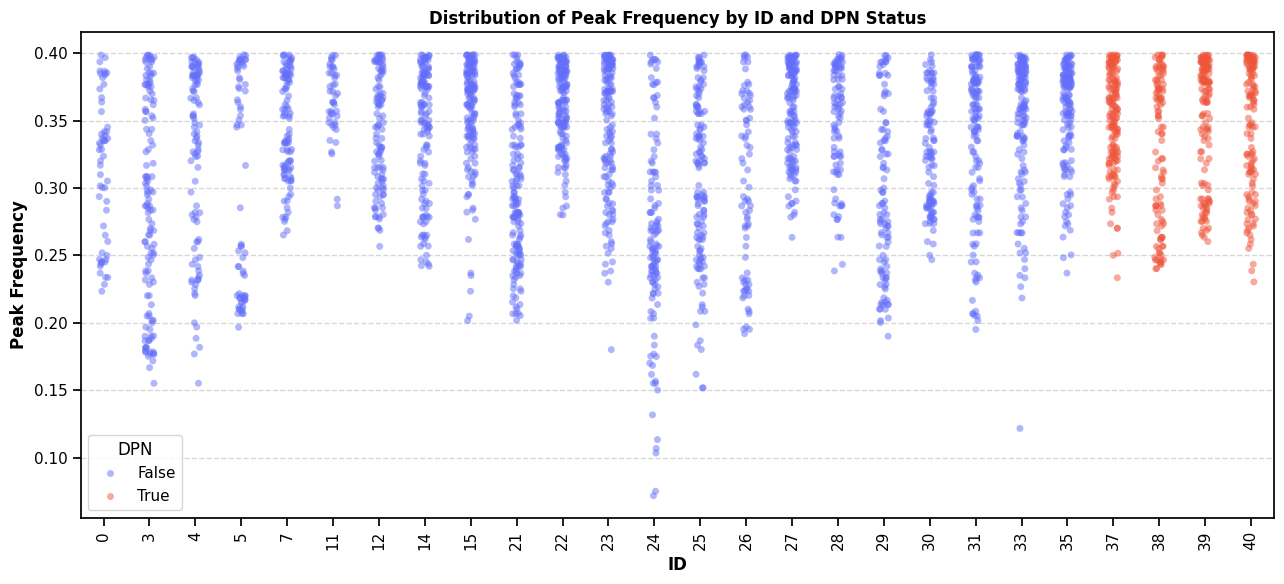

In [17]:
cleaner.draw_metric('Peak Frequency');

## Ratios

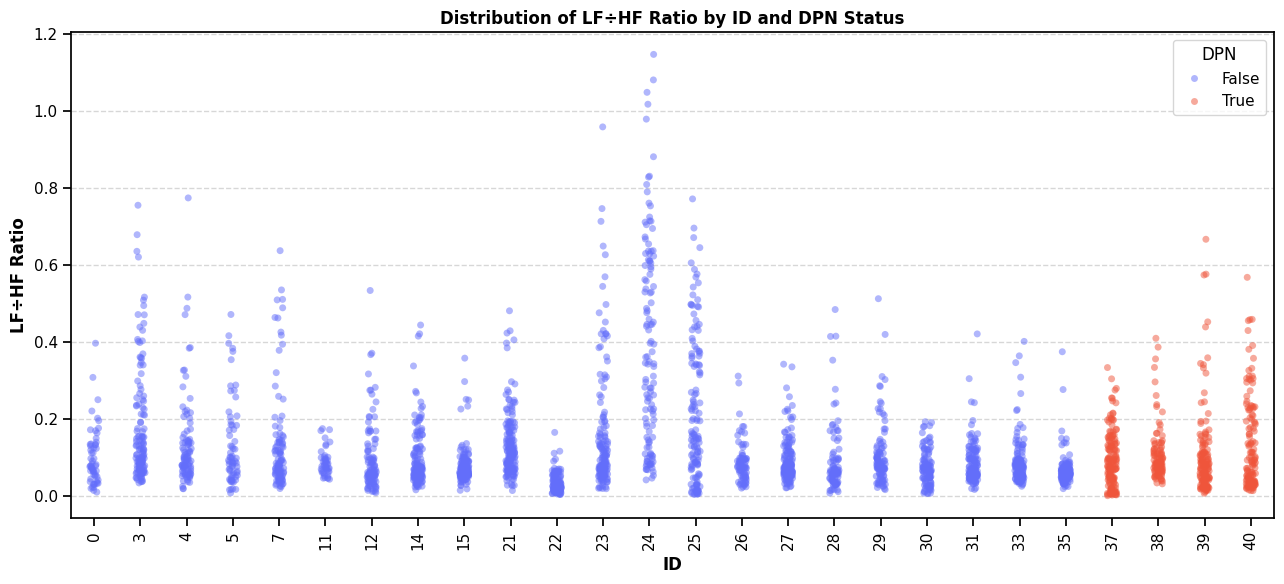

In [18]:
cleaner.upper('LF÷HF Ratio', 1.23)
cleaner.upper('LF÷HF Ratio', 0.65, [7, 33, 35])
cleaner.draw_metric( 'LF÷HF Ratio');

# NonLinear Metrics

In [19]:
non_linear_metrics

['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']

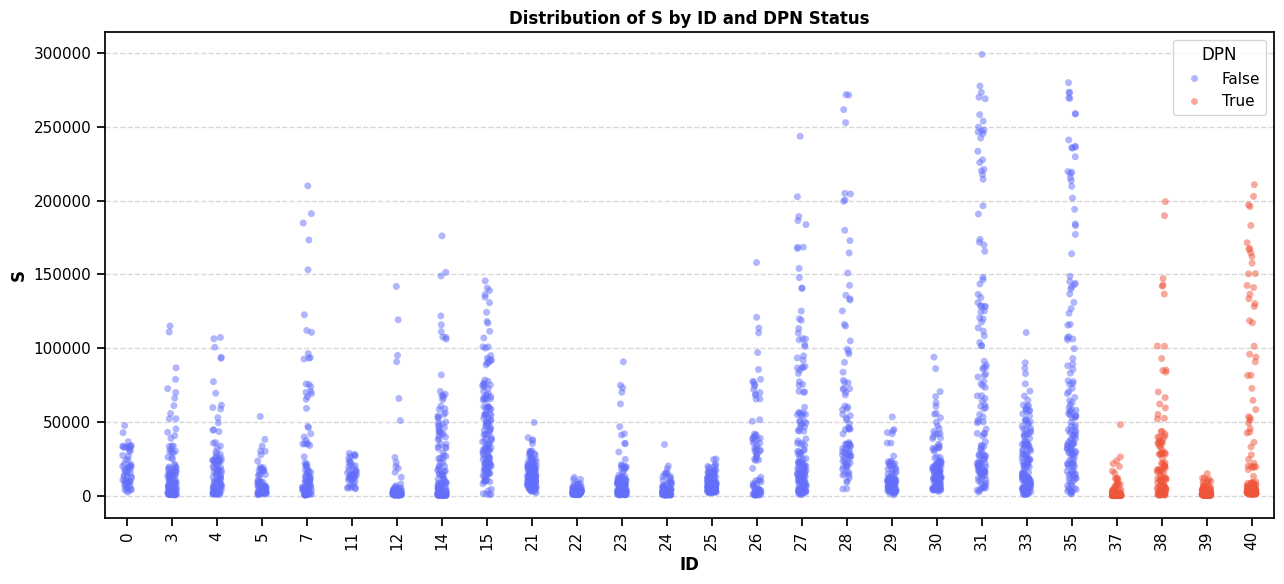

In [20]:
cleaner.draw_metric('S');

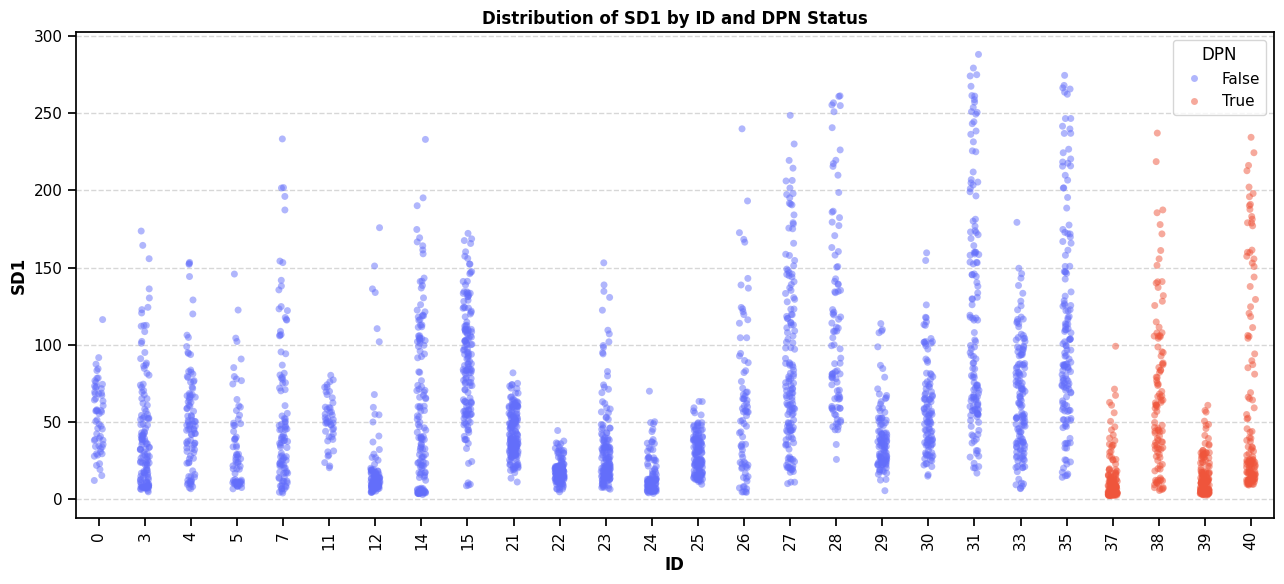

In [21]:
cleaner.draw_metric('SD1');

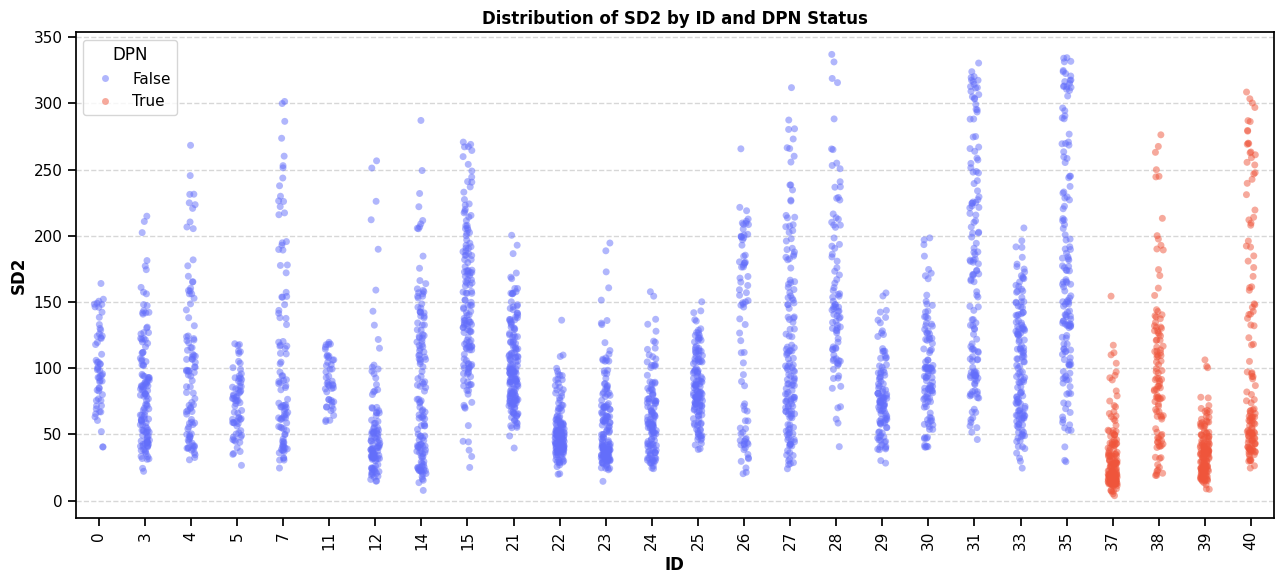

In [22]:
cleaner.draw_metric('SD2');

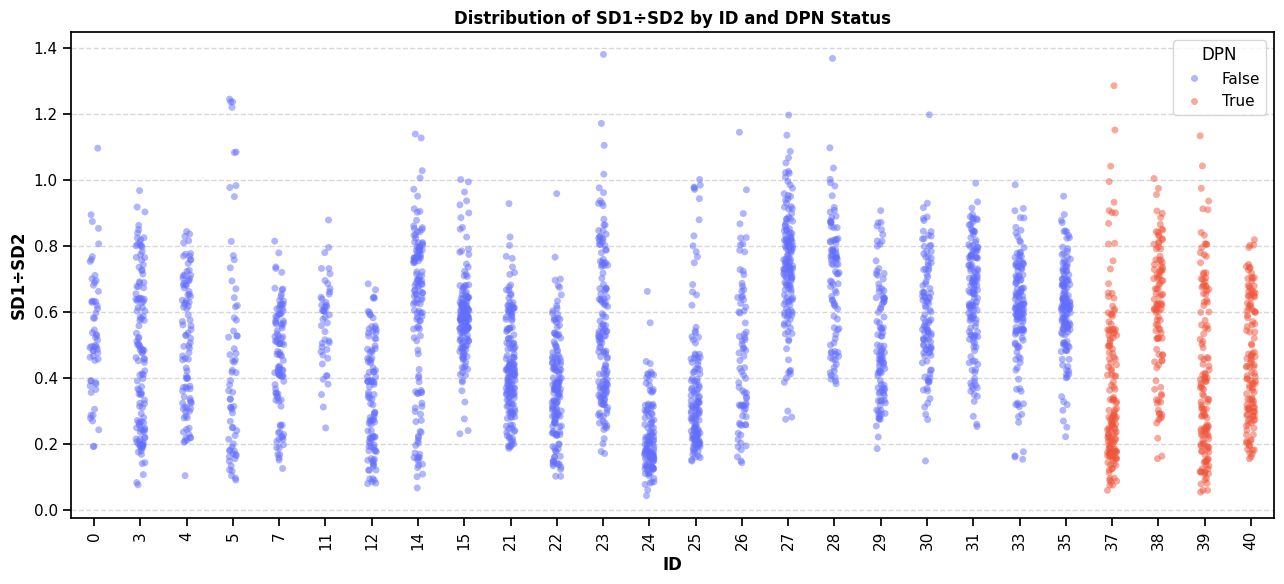

In [23]:
cleaner.draw_metric('SD1÷SD2');

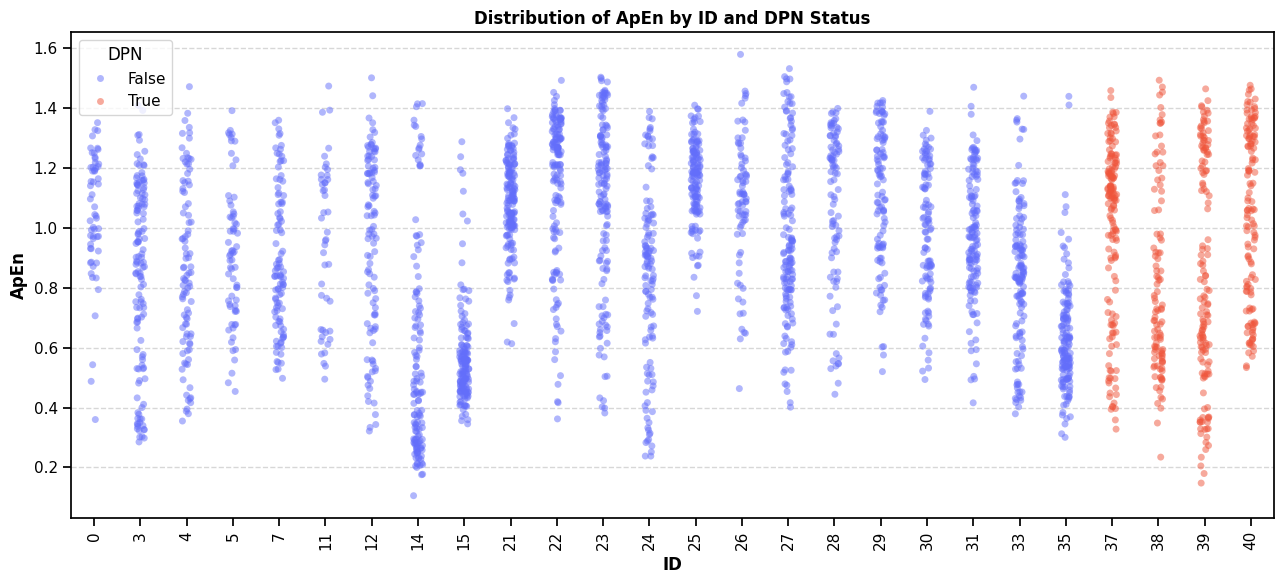

In [24]:
cleaner.lower('ApEn', 0.3,[0, 26, 29, 33])
cleaner.draw_metric('ApEn');

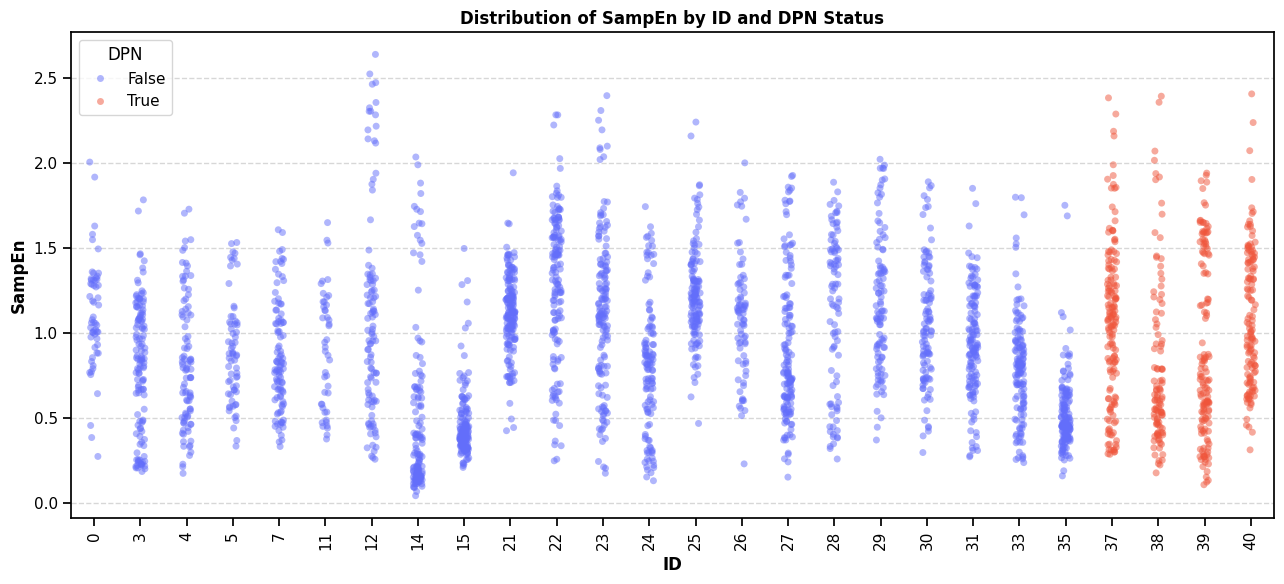

In [25]:
cleaner.upper('SampEn', 2, [3,5,15,27,35])
cleaner.draw_metric('SampEn');

# Save Data

In [26]:
import pickle

data = cleaner.data
# Create a dictionary to store the data and metrics
data_to_pickle = {
    'data': data,
    'indicator_columns': indicator_columns,
    'time_metrics': time_metrics,
    'frequency_metrics': frequency_metrics,
    'non_linear_metrics': non_linear_metrics
}


# Save the dictionary to a pickle file
with open(result_path, 'wb') as file:
    pickle.dump(data_to_pickle, file)